In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [4]:
motor_arr= [
    '03_08/VIB_0308_motor_51200.csv',
    '03_10/VIB_0310_motor_51200.csv',
    '03_11/VIB_0311_motor_51200.csv',
    '03_14/VIB_0314_motor_51200.csv',
    '03_16/VIB_0316_motor_51200.csv',
    '03_17/VIB_0317_motor_51200.csv',
    '03_21/VIB_0321_motor_51200.csv',
    '03_23/VIB_0323_motor_51200.csv',
    '03_24/VIB_0324_motor_51200.csv',
    '03_28/VIB_0328_motor_51200.csv'
]

In [5]:
pump_arr= [
    '03_08/VIB_0308_pump_51200.csv',
    '03_10/VIB_0310_pump_51200.csv',
    '03_11/VIB_0311_pump_51200.csv',
    '03_14/VIB_0314_pump_51200.csv',
    '03_16/VIB_0316_pump_51200.csv',
    '03_17/VIB_0317_pump_51200.csv',
    '03_21/VIB_0321_pump_51200.csv',
    '03_23/VIB_0323_pump_51200.csv',
    '03_24/VIB_0324_pump_51200.csv',
    '03_28/VIB_0328_pump_51200.csv'
]

In [6]:
colors = [
    'blue',
    'orange',
    'green',
    'red',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'cyan'
]

In [7]:
def pca(train_data,dimension = 2):
    pca = PCA(n_components=dimension)
    printcipalComponents = pca.fit_transform(train_data)
    principalDf = pd.DataFrame(data=printcipalComponents, columns = ['x1', 'x2'])
    return principalDf

In [8]:
def get_features(train_data):
    describe = train_data.describe(include='all')
    mean = describe.loc['mean']
    std = describe.loc['std'] #표준편차,
    min = describe.loc['min'] 
    first_quartile= describe.loc['25%']
    median = describe.loc['50%']
    third_quartile = describe.loc['75%']
    max = describe.loc['max'] 
    
    return [[mean,std,min,first_quartile,median,third_quartile,max]]

In [9]:
def data_process(data_frame,batch_size=5110):
    before = 0
    train_data = pd.DataFrame([[]])
    for i in tqdm(range(batch_size,len(data_frame),batch_size)):
        features = pd.DataFrame(get_features(data_frame[before:i]),
                                columns = ['mean','std','min','first_quartile','median','third_quartile','max'])
        before = i
        train_data = train_data.append(features,ignore_index=True)
        
    return train_data[1:]

In [10]:
def collecting(arr):
    collected_data = pd.DataFrame([[0,0]],columns = ['x1','x2'])
    for filename in tqdm(arr):
        data_set = pd.read_csv(filename, encoding = 'cp949',sep = '\t')
        data_set = data_process(data_set.iloc[:47960000,1])
        data_set = pca(data_set)
        collected_data = collected_data.append(data_set)
    return collected_data

In [11]:
def get_abnormal_data(dataset,batch_size=5110):
    minv= dataset.iloc[:,1].min()
    maxv = dataset.iloc[:,1].max()
    rng = np.random.RandomState(42)
    before = 0
    train_data = pd.DataFrame([[0]],columns = ['x1'])
    for i in tqdm(range(batch_size,len(dataset),batch_size)):  
        fragment = rng.uniform(low=minv - 10, high=maxv + 10, size=batch_size)
        fragment = pd.DataFrame(fragment,columns = ['x1'])
        
        before = i
        train_data = train_data.append(fragment)
        
    return train_data

In [20]:
def extends(arr,colors,value = 1.1):
    index = 1
    collected_data = pd.DataFrame([[0,0]],columns = ['x1','x2'])
    for filename,color in zip(arr,colors):
        print(index,"번째 파일 읽는중.................")
        data_set = pd.read_csv(filename, encoding = 'cp949',sep = '\t')
        data_set = data_set.iloc[:47960000,1]*value
        data_set = data_process(data_set)
        data_set = pca(data_set)
        min_max_scaler = preprocessing.MinMaxScaler()
        data_set = min_max_scaler.fit_transform(data_set)
        plt.scatter(data_set[:,0], data_set[:,1], color = color, label = filename[:5])
        plt.savefig(str(index)+'pump_extends.png')
        collected_data = collected_data.append(pd.DataFrame(data_set,columns = ['x1','x2']))
        index += 1
    plt.show()
    return collected_data

1 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 516.11it/s]


2 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 496.53it/s]


3 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 518.78it/s]


4 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 511.27it/s]


5 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 514.50it/s]


6 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 8785/8785 [00:17<00:00, 514.76it/s]


7 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 512.09it/s]


8 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 512.32it/s]


9 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 513.84it/s]


10 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:18<00:00, 513.64it/s]


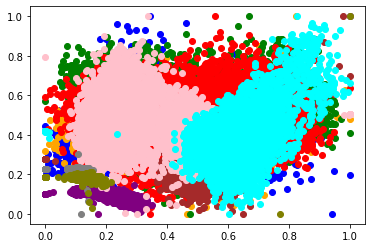

In [21]:
collected_extedns_data = extends(pump_arr,colors,value = 2)

In [22]:
collected_extedns_data.iloc[1:].to_csv('pump_extends_2.csv',encoding='cp949')

In [10]:
#collected_data.iloc[1:].to_csv('pump_collected.csv',encoding='cp949')

In [1]:
# index = 4
# for filename in pump_arr:
#         print(index,'번째 파일 읽는중.............................')
#         data_set = pd.read_csv(filename, encoding = 'cp949',sep = '\t')
#         print(index,'번째 고장 데이터 생성.............................')
#         data_set = get_abnormal_data(data_set)
#         data_set.to_csv("pump_abnormal"+str(index) +'.csv',encoding='cp949',index=False)
#         index += 1

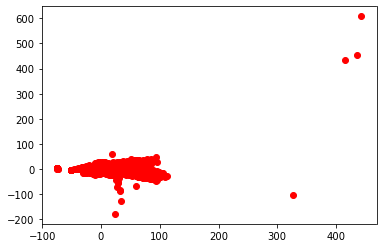

In [21]:
plt.scatter(collected_extedns_data['x1'],collected_extedns_data['x2'],color = 'red')